# Import Files

### Prior to running the code, make sure to hit Kernel --> Restart and Run All

In [1]:
import pandas as pd
from   zipfile import ZipFile
from functools import reduce
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn import preprocessing 

In [2]:
with ZipFile('ml-100k.zip') as zf:
    print(zf.namelist())
    data = pd.read_csv(zf.open('ml-100k/u.data'), sep = '\t', header = None,
          names = ["user id", "item id", "rating", "timestamp"])
    genre = pd.read_csv(zf.open('ml-100k/u.genre'), sep = '|', header = None)
    info = pd.read_csv(zf.open('ml-100k/u.info'), sep = '\t', header = None)
    occupation = pd.read_csv(zf.open('ml-100k/u.occupation'), sep = '\t', header = None)
    user = pd.read_csv(zf.open('ml-100k/u.user'), sep = '|', header = None)
    base1 = pd.read_csv(zf.open('ml-100k/u1.base'), sep = '\t', header = None)
    test1 = pd.read_csv(zf.open('ml-100k/u1.test'), sep = '\t', header = None)
    base2 = pd.read_csv(zf.open('ml-100k/u2.base'), sep = '\t', header = None)
    test2 = pd.read_csv(zf.open('ml-100k/u2.test'), sep = '\t', header = None)
    base3 = pd.read_csv(zf.open('ml-100k/u3.base'), sep = '\t', header = None)
    test3 = pd.read_csv(zf.open('ml-100k/u3.test'), sep = '\t', header = None)
    base4 = pd.read_csv(zf.open('ml-100k/u4.base'), sep = '\t', header = None)
    test4 = pd.read_csv(zf.open('ml-100k/u4.test'), sep = '\t', header = None)
    base5 = pd.read_csv(zf.open('ml-100k/u5.base'), sep = '\t', header = None)
    test5 = pd.read_csv(zf.open('ml-100k/u5.test'), sep = '\t', header = None)
    base_a = pd.read_csv(zf.open('ml-100k/ua.base'), sep = '\t', header = None)
    test_a = pd.read_csv(zf.open('ml-100k/ua.test'), sep = '\t', header = None)
    base_b = pd.read_csv(zf.open('ml-100k/ub.base'), sep = '\t', header = None)
    test_b = pd.read_csv(zf.open('ml-100k/ub.test'), sep = '\t', header = None)
    train = [base1, base2, base3, base4, base5]
    test  = [test1, test2, test3, test4, test5]

['ml-100k/', 'ml-100k/allbut.pl', 'ml-100k/mku.sh', 'ml-100k/README', 'ml-100k/u.data', 'ml-100k/u.genre', 'ml-100k/u.info', 'ml-100k/u.item', 'ml-100k/u.occupation', 'ml-100k/u.user', 'ml-100k/u1.base', 'ml-100k/u1.test', 'ml-100k/u2.base', 'ml-100k/u2.test', 'ml-100k/u3.base', 'ml-100k/u3.test', 'ml-100k/u4.base', 'ml-100k/u4.test', 'ml-100k/u5.base', 'ml-100k/u5.test', 'ml-100k/ua.base', 'ml-100k/ua.test', 'ml-100k/ub.base', 'ml-100k/ub.test']


In [3]:
data.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
item = pd.read_csv('ml-100k/u.item', sep = '|', header = None, encoding = 'latin1')

In [5]:
item.columns = ['item id', 'movie title', 'release date', 'video release date', 'IMDb URL','unknown', 
                'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
                'Sci-Fi', 'Thriller', 'War', 'Western']

item.set_index('item id', inplace = True)

In [6]:
item.head()

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Task 1: Movie Ratings

In [7]:
item['rating'] = data.pivot(*data.columns[:-1]).mean().values
item['rating']

item id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

In [8]:
for gen in genre[0]:
    count = data.pivot(*data.columns[:-1]).count() >= 50
    try:
        movie = item.loc[(item[gen] == 1) & count].sort_values(by = 'rating', ascending = False)['movie title'].values[0]
    except:
        movie = 'NaN'
    print(f'{gen:12s} : {movie}')

unknown      : NaN
Action       : Star Wars (1977)
Adventure    : Star Wars (1977)
Animation    : Close Shave, A (1995)
Children's   : Wizard of Oz, The (1939)
Comedy       : Close Shave, A (1995)
Crime        : Usual Suspects, The (1995)
Documentary  : Hoop Dreams (1994)
Drama        : Schindler's List (1993)
Fantasy      : E.T. the Extra-Terrestrial (1982)
Film-Noir    : Manchurian Candidate, The (1962)
Horror       : Psycho (1960)
Musical      : Wizard of Oz, The (1939)
Mystery      : Rear Window (1954)
Romance      : Casablanca (1942)
Sci-Fi       : Star Wars (1977)
Thriller     : Close Shave, A (1995)
War          : Schindler's List (1993)
Western      : High Noon (1952)


# Task 2: KNN

In [9]:
train_data = train[2].pivot(*train[0].columns[:-1])

In [10]:
# fill in means
mean_values = train_data.mean()

#fill in NaN values
full_train_info = train_data.fillna(train_data.mean())

In [11]:
full_train_info

1,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,,,,,,,,,,,,,,,,,,,,,
1,5.000000,3.000000,4.00,3.000000,3.318182,5.000000,4.000000,1.000000,5.000000,3.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,4.000000,3.229358,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,2.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,3.846154,3.229358,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,3.846154,3.229358,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,4.000000,3.000000,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.846154,3.229358,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,5.000000,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
940,3.846154,3.229358,3.12,2.000000,3.318182,3.636364,4.000000,5.000000,3.000000,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
941,5.000000,3.229358,3.12,3.544304,3.318182,3.636364,4.000000,3.994413,3.878049,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


In [12]:
nearest = NearestNeighbors(n_neighbors= 20, p=100).fit(full_train_info)
nn = nearest.kneighbors()
nn

(array([[2.62686569, 2.73641888, 2.73641888, ..., 2.99441347, 2.99441347,
         2.99441347],
        [2.02836091, 2.03249383, 2.11406993, ..., 3.        , 3.        ,
         3.        ],
        [2.2000068 , 2.20000827, 2.20014839, ..., 2.44660261, 2.44660261,
         2.44660261],
        ...,
        [1.3347076 , 1.44578845, 1.49275641, ..., 1.66211604, 1.66211604,
         1.66211604],
        [1.72274195, 1.8297021 , 1.85604113, ..., 1.952     , 1.952     ,
         1.952     ],
        [2.50893712, 2.53532328, 2.53532475, ..., 2.54234605, 2.54234605,
         2.54234605]]), array([[ 59, 590, 541, ..., 183, 678, 425],
        [859, 649,  25, ..., 925, 257, 682],
        [859, 826, 190, ..., 649, 110, 719],
        ...,
        [792, 699, 138, ..., 438, 606, 700],
        [671, 195, 430, ..., 515, 908, 699],
        [892, 843, 870, ..., 874, 703, 328]]))

In [13]:
dist, users = nn

In [14]:
#unr = user, neighbor, rating
unr = full_train_info.values[users]
unr.shape
# unr

(943, 20, 1650)

In [15]:
#un = user neighbor weights
un = (1/dist)/(1/dist).sum(axis=1,keepdims=True)
un.shape

(943, 20)

In [16]:
#calculate predicted user rating per movie
user_rating = np.einsum('unr, un -> ur', unr, un)

In [17]:
#confirm shape is still correct
user_rating.shape

(943, 1650)

In [18]:
predictions = pd.DataFrame(user_rating, full_train_info.index, full_train_info.columns)
predictions.head()

1,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,,,,,,,,,,,,,,,,,,,,,
1,3.810771,3.207238,3.157048,3.652300,3.318921,3.636364,3.782992,3.318568,3.997669,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,3.834341,3.192219,3.120000,3.473224,3.215050,3.653101,3.711912,4.039150,3.959911,3.803594,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,3.812630,3.206500,3.120000,3.567967,3.318182,3.636364,3.718877,3.851751,3.943780,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,3.849993,3.229358,3.163918,3.489975,3.302302,3.636364,3.822062,3.994692,3.840315,3.854299,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,3.799832,3.218086,3.120000,3.439530,3.318182,3.636364,3.701746,4.043774,3.853179,3.972995,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


## Make Movie Recommendation  - 1

In [19]:
def recommend(usr, predictions, train, query = 5):
    movs = train.loc[train[0] == usr, 1].copy() # Filter for seen movies
    first_pred  = predictions.loc[usr, ~predictions.columns.isin(movs)]
    second_pred = first_pred.loc[first_pred <4.9999].sort_values(ascending = False)
    return item.loc[second_pred.index, 'movie title'][:query]

movie_rec = recommend(100, predictions, train[0],10)

In [20]:
movie_rec

1
851           Two or Three Things I Know About Her (1966)
50                                       Star Wars (1977)
1639                  Bitter Sugar (Azucar Amargo) (1996)
119                Maya Lin: A Strong Clear Vision (1994)
1600                                  Guantanamera (1994)
1398                                          Anna (1996)
1594                                       Everest (1998)
64                       Shawshank Redemption, The (1994)
114     Wallace & Gromit: The Best of Aardman Animatio...
483                                     Casablanca (1942)
Name: movie title, dtype: object

In [21]:
p = []

def prediction(d):
    for row in d.values:
        try:
            p.append(round(predictions.loc[row[0], row[1]]))
        except:
            p.append(3)
            
prediction(test[2])

In [22]:
def mae(data, p):
    mae = lambda truth, pred : np.mean(np.fabs(truth - pred))
    return mae(data, p)

mae_non= mae(test[2][2],p)

In [23]:
mae_non

0.77615

# Task 3: Expand KNN

In [24]:
user.columns = ['user id', 'age', 'gender', 'occupation', 'zip code']

In [25]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [26]:
gender = train_data.copy()

gender.insert(0, 'gender', (user.set_index('user id').loc[gender.columns, 'gender'] == 'F') * 100)

/Users/jessicanicholson/python/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [27]:
gender.head()
#female = True, male = False

1,gender,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,,,,,,,,,,,,,,,,,,,,,
1,0,5.0,3.0,4.0,3.0,NaN,5.0,4.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# fill in means
mean_values_gender = gender.mean()

#fill in NaN values
full_gender_info = gender.fillna(gender.mean())

In [29]:
full_gender_info.head()

1,gender,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,,,,,,,,,,,,,,,,,,,,,
1,0,5.000000,3.000000,4.00,3.000000,3.318182,5.000000,4.000000,1.000000,5.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,100,4.000000,3.229358,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,0,3.846154,3.229358,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,0,3.846154,3.229358,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,100,4.000000,3.000000,3.12,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


In [30]:
nearest_gender = NearestNeighbors(n_neighbors=20, algorithm = 'brute', p=100).fit(full_gender_info)
nn_gend = nearest_gender.kneighbors()
nn_gend

(array([[2.62686569, 2.73641888, 2.73641888, ..., 2.99441347, 2.99441347,
         2.99441701],
        [2.02836091, 2.17243942, 3.        , ..., 3.02086665, 3.02086665,
         3.02086668],
        [2.20014839, 2.23977757, 2.24019123, ..., 2.44660551, 2.44660551,
         2.44660551],
        ...,
        [1.3347076 , 1.44578845, 1.49275641, ..., 1.66211604, 1.66211604,
         1.66211604],
        [1.72274195, 1.952     , 1.952     , ..., 1.9520017 , 1.95203326,
         1.95248335],
        [2.50893712, 2.53532328, 2.53532475, ..., 2.54234605, 2.54234605,
         2.54234605]]), array([[ 59, 541, 410, ..., 425, 803,  90],
        [859,  22, 941, ..., 277, 449, 203],
        [190, 614, 322, ..., 419, 157, 153],
        ...,
        [792, 699, 138, ..., 831,  32,  28],
        [671, 645, 612, ..., 590, 476, 628],
        [892, 843, 870, ..., 693, 368, 784]]))

In [31]:
dist_gend, users_gend = nn_gend

In [32]:
#unr_gend = user, neighbor, rating
unr_gend = full_gender_info.iloc[:,1:].values[users_gend]
unr_gend.shape

(943, 20, 1650)

In [33]:
#un_gend = user neighbor weights
un_gend = (1/dist_gend)/(1/dist_gend).sum(axis=1,keepdims=True)
un_gend.shape

(943, 20)

In [34]:
#calculate predicted user rating per movie having included gender in nearest neighbors
user_gend_rating = np.einsum('unr, un -> ur', unr_gend, un_gend)

In [35]:
user_gend_rating

array([[3.85125932, 3.24415844, 3.15721573, ..., 2.        , 3.        ,
        3.        ],
       [3.80136868, 3.29205306, 3.15617888, ..., 2.        , 3.        ,
        3.        ],
       [3.869459  , 3.20586548, 3.12      , ..., 2.        , 3.        ,
        3.        ],
       ...,
       [3.94881703, 3.2293578 , 3.21661813, ..., 2.        , 3.        ,
        3.        ],
       [3.86143697, 3.2293578 , 3.12      , ..., 2.        , 3.        ,
        3.        ],
       [4.00830425, 3.28354854, 3.058037  , ..., 2.        , 3.        ,
        3.        ]])

In [48]:
gend_predictions = pd.DataFrame(user_gend_rating, full_gender_info.index, full_gender_info.columns[1:])
gend_predictions

1,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,,,,,,,,,,,,,,,,,,,,,
1,3.851259,3.244158,3.157216,3.650725,3.318924,3.636364,3.792354,3.367782,3.998211,3.804008,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,3.801369,3.292053,3.156179,3.444260,3.254927,3.653813,3.748559,3.946695,3.889381,3.803929,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
3,3.869459,3.205865,3.120000,3.590979,3.318182,3.636364,3.784631,3.946452,3.994662,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,3.907644,3.229358,3.163966,3.467149,3.302285,3.636364,3.822082,3.994693,3.846366,3.854365,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,3.861622,3.229358,3.120000,3.566964,3.318182,3.636364,3.831704,3.994969,3.745010,3.854083,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.846154,3.229358,3.120000,3.544304,3.318182,3.636364,3.803226,3.994413,3.878049,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
940,3.788953,3.218029,3.120000,3.486496,3.318182,3.636364,3.822664,4.048847,3.846727,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
941,3.948817,3.229358,3.216618,3.544304,3.318182,3.636364,3.870868,3.994413,3.836805,3.794118,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


## Make Movie Recommendation - 2

In [37]:
def gender_recommend(usr, gend_predictions, train, query = 5):
    movs = train.loc[train[0] == usr, 1].copy() # Filter for seen movies
    first_pred  = gend_predictions.loc[usr, ~gend_predictions.columns.isin(movs)]
    second_pred = first_pred.loc[first_pred <4.9999].sort_values(ascending = False)
    return item.loc[second_pred.index, 'movie title'][:query]

gend_movie_rec = recommend(100, gend_predictions, train[0],10)

In [38]:
gend_movie_rec

1
851           Two or Three Things I Know About Her (1966)
1600                                  Guantanamera (1994)
1398                                          Anna (1996)
1639                  Bitter Sugar (Azucar Amargo) (1996)
119                Maya Lin: A Strong Clear Vision (1994)
1594                                       Everest (1998)
50                                       Star Wars (1977)
114     Wallace & Gromit: The Best of Aardman Animatio...
483                                     Casablanca (1942)
64                       Shawshank Redemption, The (1994)
Name: movie title, dtype: object

In [39]:
p = []

def gend_pred(d):
    for row in d.values:
        try:
            p.append(round(gend_predictions.loc[row[0], row[1]]))
        except:
            p.append(2.5)
            
gend_pred(test[0])

In [40]:
def mae(data, p):
    mae = lambda gend_truth, gend_pred : np.mean(np.fabs(gend_truth - gend_pred))
    return mae(data, p)

mae_gender = mae(test[0][2],p)

In [41]:
mae_gender

0.75565

# Results

In [42]:
non = pd.DataFrame(movie_rec)
gender = pd.DataFrame(gend_movie_rec)

In [43]:
gender

,movie title
1,
851,Two or Three Things I Know About Her (1966)
1600,Guantanamera (1994)
1398,Anna (1996)
1639,Bitter Sugar (Azucar Amargo) (1996)
119,Maya Lin: A Strong Clear Vision (1994)
1594,Everest (1998)
50,Star Wars (1977)
114,Wallace & Gromit: The Best of Aardman Animatio...
483,Casablanca (1942)


In [44]:
non

,movie title
1,
851,Two or Three Things I Know About Her (1966)
50,Star Wars (1977)
1639,Bitter Sugar (Azucar Amargo) (1996)
119,Maya Lin: A Strong Clear Vision (1994)
1600,Guantanamera (1994)
1398,Anna (1996)
1594,Everest (1998)
64,"Shawshank Redemption, The (1994)"
114,Wallace & Gromit: The Best of Aardman Animatio...


In [45]:
mae_gender, mae_non

(0.75565, 0.77615)

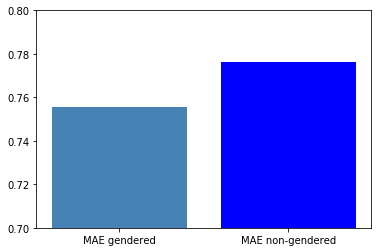

In [46]:
x = np.arange(2)
y = [0.75565,0.77615]

fig, ax = plt.subplots()
plt.bar(x, y, color =("steelblue", "blue"))
plt.xticks(x, ('MAE gendered', 'MAE non-gendered'))
plt.ylim((0.7,0.8))
plt.show()


Text(0, 0.5, 'Rating Difference')

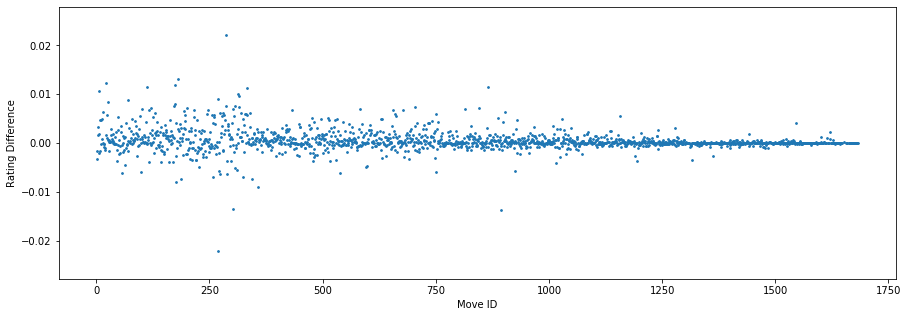

In [47]:
plt.figure(figsize = (15, 5))

plt.scatter(predictions.columns, gend_predictions.mean() - predictions.mean(), s = 3)
plt.xlabel("Move ID")
plt.ylabel("Rating Difference")